# FUEL ECONOMY PREDICTION
## THE SITUATION
You've just been hired as a Product Data Scientist for Consumer Reports Magazine, a trusted source for information on consumer products and services.

## THE ASSIGNMENT
Fuel economy is a major factor in the cost of owning a car, so they are studying the automobile characteristics that impact fuel economy for an upcoming article. You've been asked to build a regression model to predict fuel economy based on characteristics like the car's weight, model year, acceleration, and more.

## THE OBJECTIVES
1. Prepare and explore the data
2. Split the data and build a multiple regression model
3. Evaluate model test performance and interpret the model
4. Challenge: Build a ridge regression model and compare the results

# The Data Set

Automotive Fuel Economy

Fuel economy data for cars released in the US market in the 1970s and 1980s.

## Objective 1
### Prepare and Explore the Data
Your first objective is to prepare the data for modelling, explore the target ('mpg') and other features in the dataset, and fix any issues you encounter.

1. Read in the auto-mpg.csv dataset, and check datatypes and columns for missing or unusual values
2. Convert ‘origin’ to a categorical feature
3. Calculate summary statistics for each of the numeric columns in the dataset including min, max and mean, then build a histogram of the target variable (‘mpg’)
4. Explore relationships between the features and the ‘mpg’ column, and use scatterplots and build a correlation heatmap. Which column is most strongly correlated with ‘mpg’?

In [51]:
import pandas as pd 
import seaborn as sns

In [52]:
mpg = pd.read_csv("auto-mpg.csv", dtype={"origin" : "object"})

mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [72]:
mpg.info() # horsepower should be an integer, let's check that

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [59]:
mpg["horsepower"].unique() # we have  '?', may be for unknown value

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [63]:
mpg.query("horsepower == '?'") # we have 6 rows containing'?',we can impute this with the mean, or 0 or look for assistance

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [67]:
mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors="coerce") 
# errors="coerce" will pull the error with pandas NULL values

mpg["horsepower"] = mpg["horsepower"].fillna(mpg["horsepower"].mean())
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [68]:
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [73]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='mpg', ylabel='Count'>

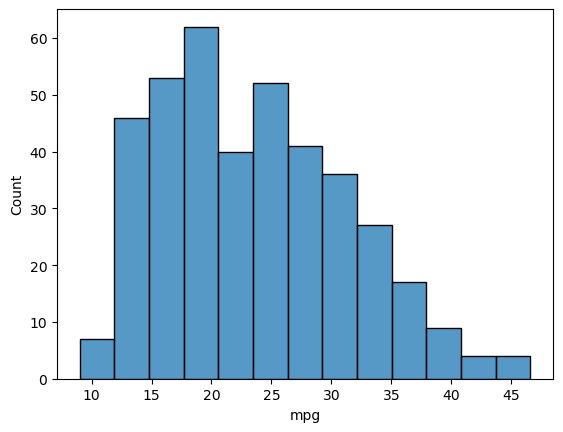

In [71]:
sns.histplot(mpg["mpg"])

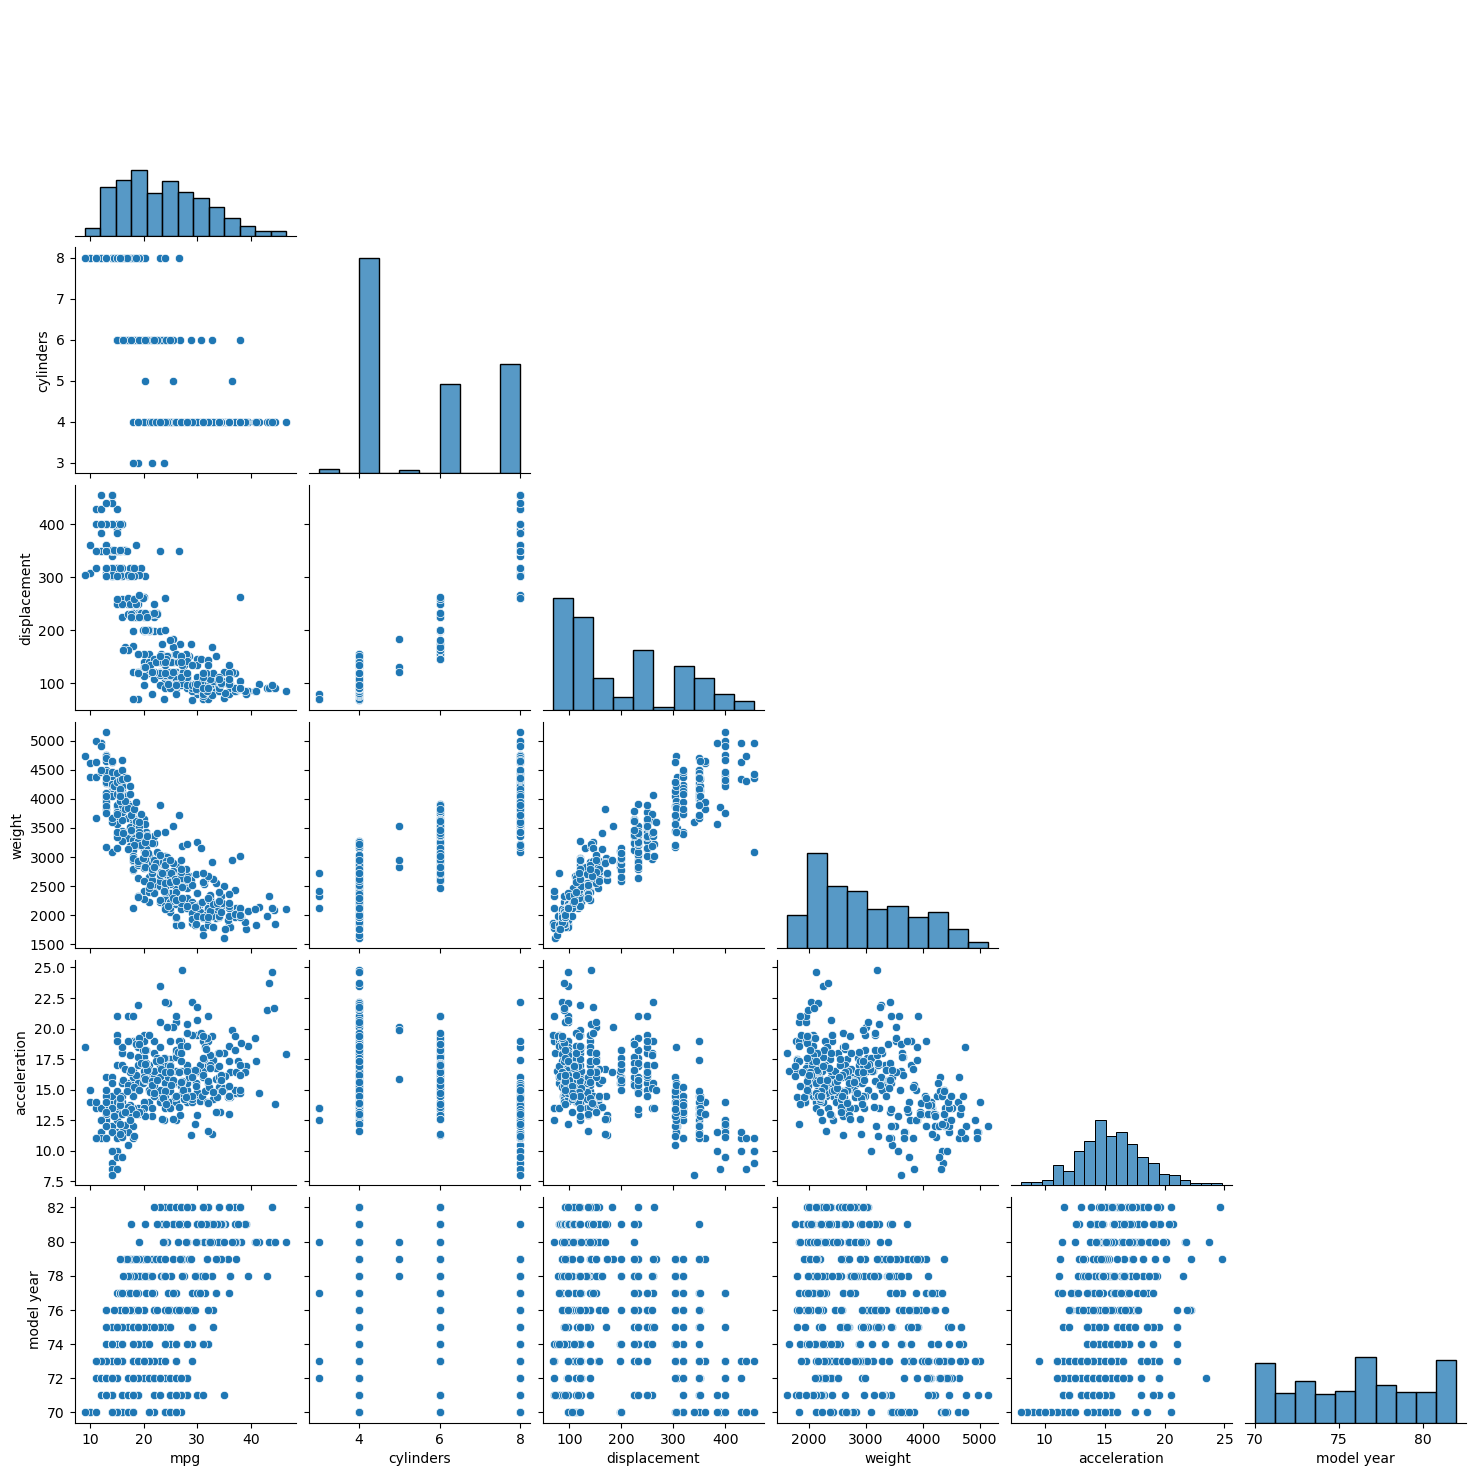

In [56]:
sns.pairplot(mpg, corner=True);

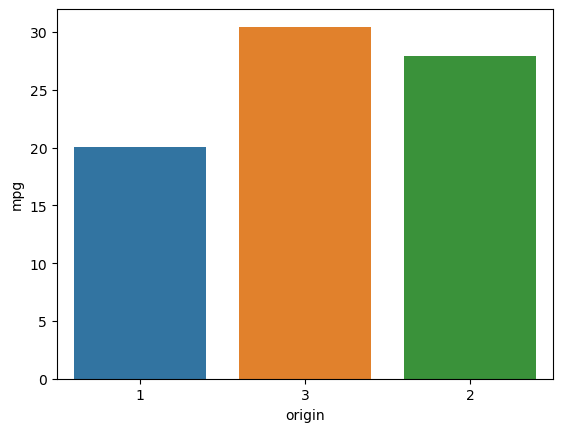

In [97]:
sns.barplot(data=mpg, x="origin", y="mpg",hue="origin", errorbar=None);

In [84]:
mpg.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


<Axes: >

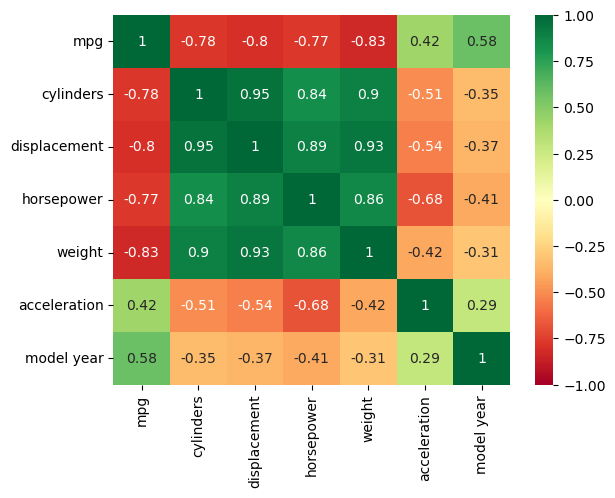

In [85]:
sns.heatmap(mpg.corr(numeric_only=True), annot=True, cmap="RdYlGn", vmin=-1, vmax=1)

## Objective 2
### Split the data and build a multiple regression model
Your second objective is to split the data into training and test data, then fit a multiple regression model using the validation scheme of your choice. Perform feature engineering and variable selection, and check whether any assumptions are violated.

1. Split the data into train and test, then then set up a validation scheme of your choice
2. Fit a baseline regression model using the feature with the strongest correlation to the target (‘mpg’)
3. Fit a multiple regression model. Perform any feature selection and feature engineering necessary, fixing any violated assumptions along the way

#### Question  1 & 2 : We have small sized datasets (398 <10,000 rows), so cross validation is more appropriate than simple validation

### Simple Linear Regression, we choose the good predictor of our target only

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
from sklearn.model_selection import KFold # small dataset (398 < 10K rows), we should use cross validation

import statsmodels.api as sm 

import numpy as np 

features = ["weight"] # the weight is the good predictor of mpg, (for simple linear regression )

X = sm.add_constant(mpg[features])
y = mpg["mpg"]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2023)


kf = KFold(n_splits=5, shuffle=True, random_state=2023) # 5 validation sets

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []


# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    
    # Fit the model on fol's training data :  we fit on training datsets
    model = sm.OLS(y_train, X_train).fit()
    
    # Append Validation score to list :  we score on validation datasets
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))
    

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.775, 0.7, 0.645, 0.603, 0.662]
Cross Val R2s: 0.677 +- 0.058
All Validation MAEs:  [2.805, 3.249, 3.498, 3.735, 3.635]
Cross Val MAEs: 3.384 +- 0.333


In [116]:
def residual_analysis_plot(model):
    
    import scipy.stats as stats 
    import matplotlib.pyplot as plt 
    
    predictions = model.predict()
    residuals = model.resid 
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

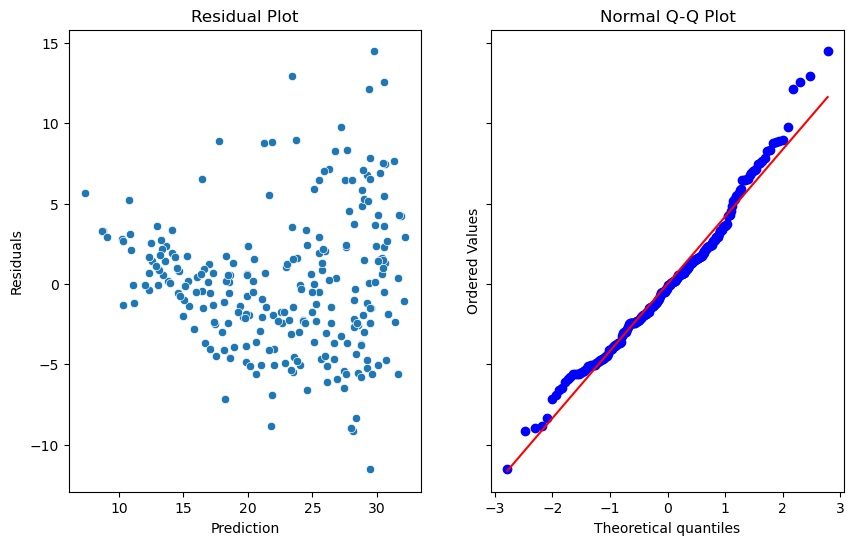

In [118]:
residual_analysis_plot(model);

### Multiple Linear Regression

3. Question 3: Fit a multiple regression model. Perform any feature selection and feature engineering necessary, fixing any violated assumptions along the way

In [128]:
mpg_model = mpg.assign(
    weight_2 = mpg["weight"] ** 2
).drop("car name", axis=1)

mpg_model = pd.get_dummies(mpg_model, dtype="int", drop_first=True)

In [129]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight_2,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,0,0


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
from sklearn.model_selection import KFold # small dataset (398 < 10K rows), we should use cross validation

import statsmodels.api as sm 

import numpy as np 

features = [
    "weight",
    "weight_2",
#     "cylinders",  # These commented features are insignificants, we choose to drop them, 
#     "displacement",
#     "horsepower",
#     "acceleration",
    "model year", 
    "origin_2", 
    "origin_3"
] 

X = sm.add_constant(mpg_model[features])
y = mpg_model["mpg"]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2023)


kf = KFold(n_splits=5, shuffle=True, random_state=2023) # 5 validation sets

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []


# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    
    # Fit the model on fol's training data :  we fit on training datsets
    model = sm.OLS(y_train, X_train).fit()
    
    # Append Validation score to list :  we score on validation datasets
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))
    

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")
print(" ")
print('''Our R2 Score jump to 0.851 and the MAE jump down to 2.233, 
there is a generall improvement, here using multiple features''')

All Validation R2s:  [0.881, 0.866, 0.835, 0.84, 0.837]
Cross Val R2s: 0.852 +- 0.019
All Validation MAEs:  [1.879, 2.244, 2.396, 2.209, 2.394]
Cross Val MAEs: 2.224 +- 0.189
 
Our R2 Score jump to 0.851 and the MAE jump down to 2.233, 
there is a generall improvement, here using multiple features


In [150]:
def residual_analysis_plot(model):
    
    import scipy.stats as stats 
    import matplotlib.pyplot as plt 
    
    predictions = model.predict()
    residuals = model.resid 
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

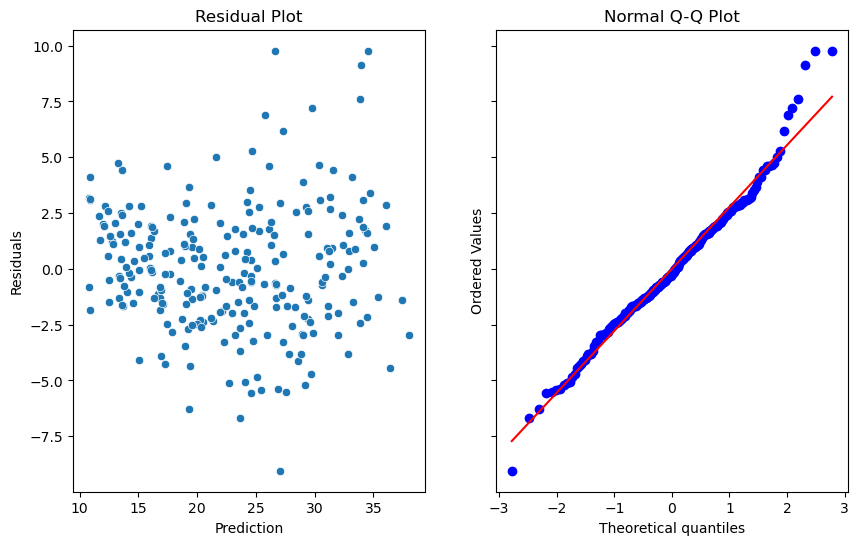

In [151]:
residual_analysis_plot(model);

In [154]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     395.1
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          1.26e-132
Time:                        11:22:31   Log-Likelihood:                -794.02
No. Observations:                 318   AIC:                             1600.
Df Residuals:                     312   BIC:                             1623.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4975      4.455     -0.561      0.575     -11.262       6.267
weight        -0.0210      0.002    -12.303      0.000      -0.024      -0.018
weight_2    2.335e-06    2.6e-07      8.991      0.000    1.82e-06    2.85e-06
model year     0.8660      0.048     17.877      0.000       0.771       0.961
origin_2       1.8085      0.513      3.522      0.000       0.798       2.819
origin_3       1.0262      0.548      1.873      0.062      -0.052       2.104
==============================================================================
Omnibus:                       37.035   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.827
Skew:                           0.627   Prob(JB):                     5.64e-17
Kurtosis:                       5.019   Cond. No.                     2.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Objective 3
### Evaluate model test performance and interpret the model
Score your model on the test data set, use your model to predict a new batch of cars, and interpret your model results.

1. Score your final model on the test set, calculating both R2 and MAE. If your test R2 is less than 8, revisit the modelling process
2. Interpret your model. What impact does a one-year increase in model year have on the predicted mileage?
3. BONUS: Repeat the modelling process using ridge regression. How much better was the ridge model than traditional regression, if at all?

### Score on Test
1. Score your final model on the test set, calculating both R2 and MAE. If your test R2 is less than 8, revisit the modelling process
2. Interpret your model. What impact does a one-year increase in model year have on the predicted mileage?

In [156]:
model = sm.OLS(y, X).fit()

print(f"Training R2: {r2(y, model.predict(X))}")
print(f"Testing R2: {r2(y_test, model.predict(X_test))}")
print(" ")
print(f"Training MAE: {mae(y, model.predict(X))}")
print(f"Testing MAE: {mae(y_test, model.predict(X_test))}")

Training R2: 0.8636172977355414
Testing R2: 0.8087480897721557
 
Training MAE: 2.186805914157295
Testing MAE: 2.265931363980323


In [157]:
model.summary() # One model year increase, increase the mpg by 0.8660 holding others variables constant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     395.1
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          1.26e-132
Time:                        11:50:02   Log-Likelihood:                -794.02
No. Observations:                 318   AIC:                             1600.
Df Residuals:                     312   BIC:                             1623.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4975      4.455     -0.561      0.575     -11.262       6.267
weight        -0.0210      0.002    -12.303      0.000      -0.024      -0.018
weight_2    2.335e-06    2.6e-07      8.991      0.000    1.82e-06    2.85e-06
model year     0.8660      0.048     17.877      0.000       0.771       0.961
origin_2       1.8085      0.513      3.522      0.000       0.798       2.819
origin_3       1.0262      0.548      1.873      0.062      -0.052       2.104
==============================================================================
Omnibus:                       37.035   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.827
Skew:                           0.627   Prob(JB):                     5.64e-17
Kurtosis:                       5.019   Cond. No.                     2.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### These predictors show high multicollinearity among themselves:

* cylinders & displacement: 0.95
* displacement & weight: 0.93
* cylinders & weight: 0.90
    
So I can start directely with Ridge Regression rather than simple linear regression because:

The strong multicollinearity between predictors (features) would make regular linear regression unstable. <br>
Ridge regression would help handle the multicollinearity while keeping all features
We have multiple potentially important predictors that all seem relevant

### Challenge :  Ridge Regression

BONUS: Repeat the modelling process using ridge regression. How much better was the ridge model than traditional regression, if at all?

In [168]:
mpg_model = mpg.assign(
    weight_2 = mpg["weight"] ** 2,
    weight_3 = mpg["weight"] ** 3,
    accel_2 = mpg["acceleration"] ** 2,
    accel_3 = mpg["acceleration"] ** 3,
    hp_2 = mpg["horsepower"] ** 2,
    hp_3 = mpg["horsepower"] ** 3
).drop("car name", axis=1)

mpg_model = pd.get_dummies(mpg_model, dtype="int", drop_first=True)

In [177]:


features = [
    "weight",
    "weight_2",
    "weight_3",
    "cylinders",  
    "displacement",
    "horsepower",
    "hp_2",
    "hp_3",
    "acceleration",
    "accel_2",
    "accel_3",
    "model year", 
    "origin_2", 
    "origin_3"
] 

X = sm.add_constant(mpg_model[features])
y = mpg_model["mpg"]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

In [178]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_m = std.fit_transform(X.values) 
X_te = std.transform(X_test.values)

In [182]:
from sklearn.linear_model import RidgeCV

n_alphas = 200

alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5) # 5 cross validation sets

ridge_model.fit(X_m, y)

# training metrics : score r2, mae, alpha_ param
print(ridge_model.score(X_m, y)) # r2 
print(mae(y, ridge_model.predict(X_m)))
print(ridge_model.alpha_)  # get best alpha 


0.878042387056988
2.0657831173344596
0.29673024081888694


#### Score on The Test 

In [187]:
print("Model performance using Ridge Regression - On Test set : ")
print(f"Testing R2: {r2(y_test, ridge_model.predict(X_te))}")
print(f"Testing MAE: {mae(y_test, ridge_model.predict(X_te))}")

Model performance using Ridge Regression - On Test set : 
Testing R2: 0.8126043012356494
Testing MAE: 2.2317668835748856


# 😎😋😊 Conclusion - :  We can see that the Ridge Regression here applied didn't significantly improve our model (compare to Linear Regression), so we can stick with our linear model one, which is in addition more interpretable, with 5 variables that we could easily explain to stakeholders or consumers.